<a href="https://colab.research.google.com/github/VitoRondinone/Health-Data-Analysis-Portfolio/blob/main/04_epidemiological_risk_odds_ratio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 4: Epidemiological Risk Analysis

### Objective
In this project, we apply fundamental epidemiological concepts to the NHANES dataset. Specifically, we aim to calculate the **Odds Ratio (OR)** to quantify the association between **Obesity** and **Hypertension**.

### Methodology
1.  **Data Setup:** Load the dataset and select relevant physiological variables (BMI and Systolic Blood Pressure).
2.  **Feature Engineering:** Transform continuous variables into binary categories (e.g., "Obese" vs. "Not Obese").
3.  **Risk Assessment:** Create a contingency table and calculate the Odds Ratio to determine if obesity is a significant risk factor for hypertension.

In [2]:
# 1. ENVIRONMENT SETUP & INSTALLATION
# Install the NHANES package if not already present
!pip install nhanes

import pandas as pd
from scipy.stats import chi2_contingency
from nhanes.load import load_NHANES_data

# 2. LOAD DATA
# We use the 2017-2018 data cycle
df = load_NHANES_data(year='2017-2018')

# 3. DATA SELECTION AND CLEANING
# Select only the variables needed for this analysis:
# - BodyMassIndexKgm2 (BMI)
# - SystolicBloodPres1StRdgMmHg (Systolic Blood Pressure)
df_project4 = df[['BodyMassIndexKgm2', 'SystolicBloodPres1StRdgMmHg']].dropna().copy()

# Rename columns to simple, lowercase names for easier coding
df_project4.columns = ['bmi', 'bp']

# 4. PREVIEW
# Check the first few rows to confirm data is ready
print(f"Data Loaded Successfully. Total records: {df_project4.shape[0]}")
print(df_project4.head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.4 MB/s eta 0:00:00
Data Loaded Successfully. Total records: 6230
          bmi     bp
SEQN                
93706.0  21.5  112.0
93707.0  18.1  128.0
93709.0  38.9  120.0
93711.0  21.3  108.0
93712.0  19.7  112.0


### Feature Engineering and Risk Calculation

To perform the risk analysis, we first categorize the continuous variables into binary groups based on standard medical thresholds:
* **Obesity:** BMI $\ge$ 30 (World Health Organization definition).
* **Hypertension:** Systolic Blood Pressure $\ge$ 140 mmHg.

We then construct a **Contingency Table** to visualize the frequency distribution and calculate the **Odds Ratio (OR)** along with the **Chi-Square test** to assess statistical significance.

In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. FEATURE ENGINEERING
# Create a working copy to avoid warnings
df_risk = df_project4.copy()

# Define Binary Categories
# True if BMI is 30 or higher (Obese)
df_risk['is_obese'] = df_risk['bmi'] >= 30
# True if Systolic BP is 140 or higher (Hypertension)
df_risk['has_hypertension'] = df_risk['bp'] >= 140

# 2. CONTINGENCY TABLE (CROSSTAB)
# This creates the standard 2x2 epidemiological matrix
contingency_table = pd.crosstab(df_risk['is_obese'], df_risk['has_hypertension'])

# Rename rows and columns for professional output
contingency_table.index = ['Not Obese', 'Obese']
contingency_table.columns = ['Normal BP', 'Hypertension']

print("--- Contingency Table (2x2) ---")
print(contingency_table)
print("-" * 30)

# 3. STATISTICAL ANALYSIS
# Calculate Odds Ratio (OR) manually: (a*d) / (b*c)
a = contingency_table.loc['Not Obese', 'Normal BP']
b = contingency_table.loc['Not Obese', 'Hypertension']
c = contingency_table.loc['Obese', 'Normal BP']
d = contingency_table.loc['Obese', 'Hypertension']

odds_ratio = (a * d) / (b * c)

# Calculate Chi-Square and P-value using scipy
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Odds Ratio: {odds_ratio:.2f}")
print(f"P-value: {p_value:.4e}")

# 4. AUTOMATED INTERPRETATION
print("\n--- Conclusion ---")
if p_value < 0.05 and odds_ratio > 1:
    print(f"Statistically Significant Result: Individuals with Obesity are {odds_ratio:.2f} times more likely to have Hypertension.")
else:
    print("No significant association detected.")

--- Contingency Table (2x2) ---
           Normal BP  Hypertension
Not Obese       3515           599
Obese           1685           431
------------------------------
Odds Ratio: 1.50
P-value: 6.2854e-09

--- Conclusion ---
Statistically Significant Result: Individuals with Obesity are 1.50 times more likely to have Hypertension.


### Visualization
The following chart compares the prevalence of hypertension between the two groups. The visual difference reinforces the Odds Ratio calculated above.

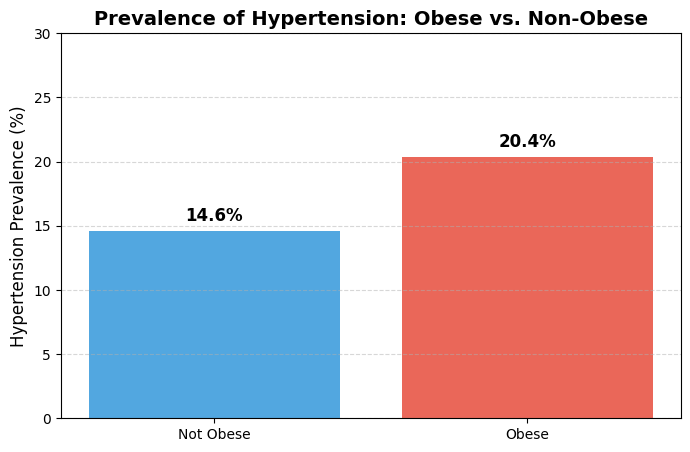

In [4]:
import matplotlib.pyplot as plt

# 1. PREPARE DATA FOR PLOTTING
# Calculate the percentage of hypertension in each group
# We use 'groupby' on the boolean column: the mean gives the proportion (0 to 1), multiply by 100 for percentage
hypertension_rates = df_risk.groupby('is_obese')['has_hypertension'].mean() * 100

# 2. CREATE PLOT
plt.figure(figsize=(8, 5))

# Define colors: Blue for Not Obese, Red for Obese (to signal risk)
colors = ['#3498db', '#e74c3c']
bars = plt.bar(['Not Obese', 'Obese'], hypertension_rates, color=colors, alpha=0.85)

# 3. STYLING
plt.title('Prevalence of Hypertension: Obese vs. Non-Obese', fontsize=14, fontweight='bold')
plt.ylabel('Hypertension Prevalence (%)', fontsize=12)
plt.ylim(0, 30)  # Set limit a bit higher than data to make room for labels
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 4. ADD LABELS
# Loop over the bars to place the percentage number on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()